In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("Crop_recommendation.csv")

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [5]:
df.shape

(1697, 8)

In [6]:
df.to_csv("cleaned_df.csv")

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['label'].unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [9]:
df['label'].value_counts()

label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
watermelon    100
grapes        100
apple         100
cotton        100
Name: count, dtype: int64

In [10]:
X=df.drop(columns="label")
y=df['label']

In [12]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684
1693,114,94,53,26.335449,76.853201,6.190757,118.685826
1694,110,78,50,25.937302,78.898644,5.915569,98.217475
1695,94,70,48,25.136865,84.883944,6.195152,91.464425


In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
le=LabelEncoder()
sc=StandardScaler()

In [16]:
le.fit_transform(y_train)
le.fit_transform(y_test)

array([ 6,  9,  9,  3,  5,  4,  6,  2,  4,  2, 11, 12, 12,  0, 11,  5, 10,
       11,  3, 12,  9, 13,  2, 13, 13,  7,  1,  2, 12,  8,  9,  3, 11,  1,
        7,  8,  4,  2, 12,  8,  0, 10,  3, 10,  6,  7, 14,  1,  7, 13, 13,
        6, 13,  3,  4,  7,  0,  6,  0,  2,  8,  3,  4,  8, 10,  2,  5, 13,
        5, 12,  6, 12, 12, 13,  3,  4,  3, 12, 14,  5,  0, 13,  5,  5, 11,
        0, 10, 13,  3, 13, 11,  5,  6, 10, 14,  0, 14, 12,  5,  8,  3,  5,
        7,  2,  0, 12,  0,  0,  1,  8,  7, 12, 13, 12,  5, 11,  3, 11, 10,
       10,  2, 14,  8, 14, 14, 10, 13,  4,  8,  3, 10, 13,  5, 10,  3,  9,
        5,  3,  1,  2,  8,  3,  5,  6,  0,  9, 12, 14, 10,  0,  3,  1,  4,
        0,  0,  9,  9,  5,  8,  4, 10, 14,  5, 12,  3, 10,  0, 12,  4, 12,
        6, 14, 13,  8,  5,  9,  8,  2, 13,  9,  8,  6,  3, 10,  3,  1,  3,
        1, 13,  3, 13,  2,  8,  4, 11,  8,  6,  0, 12,  9, 11,  5, 14, 11,
        2,  6,  7,  4, 14, 13,  2,  5,  3,  7,  3, 11,  1,  7,  4, 13, 14,
        7,  9, 14,  7,  8

In [17]:
sc.fit(X_train)

StandardScaler()

In [18]:
sc.transform(X_train)
sc.transform(X_test)

array([[-0.88936497, -0.65455539, -0.48880334, ...,  0.71448045,
         0.48082076, -0.98936224],
       [ 0.25394562,  0.0185691 , -0.52433125, ..., -0.45108406,
        -0.30607981, -0.70182638],
       [ 1.16339722, -0.39115885, -0.5420952 , ...,  0.32184442,
         0.06469931,  0.1599504 ],
       ...,
       [-0.86338064,  1.89161115,  2.70870879, ...,  0.60024878,
         0.02166618, -0.67532422],
       [-0.78542764,  0.0185691 , -0.57762312, ..., -0.32902919,
        -1.42064563, -0.79109691],
       [-1.30511427,  0.57462846, -0.47103938, ..., -1.78215155,
        -0.99791371, -0.73156965]], shape=(340, 7))

In [19]:
dtc=DecisionTreeClassifier()

In [20]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=dtc.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
cm=confusion_matrix(y_test,y_pred)

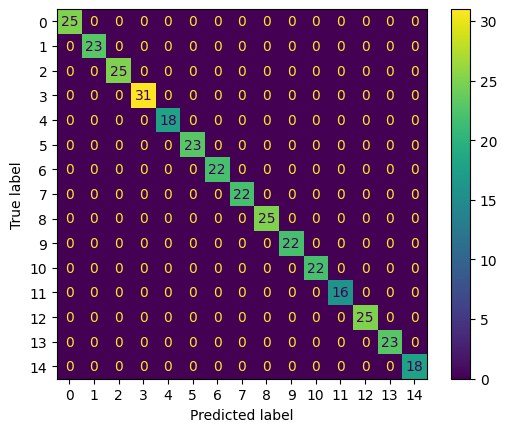

In [24]:
ConfusionMatrixDisplay(cm).plot()

In [25]:
dtc.predict(pd.DataFrame([[50,60,80,23,12.2,5.6,205.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['Soyabeans'], dtype=object)

In [26]:
import pickle as pkl

In [27]:
pkl.dump(dtc,open("decision_tree_model.pkl","wb"))

In [28]:
model=pkl.load(open("decision_tree_model.pkl","rb"))

In [29]:
model.predict(pd.DataFrame([[90,90,29,83,132,6.8,255.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['apple'], dtype=object)

**Random Forest classficer**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
Rfc=RandomForestClassifier(n_estimators=8,criterion='entropy')

In [32]:
Rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8)

In [33]:
y_pred_1=Rfc.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_1)

0.9941176470588236

In [35]:
cm1=confusion_matrix(y_test,y_pred_1)

In [36]:
cm1

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0

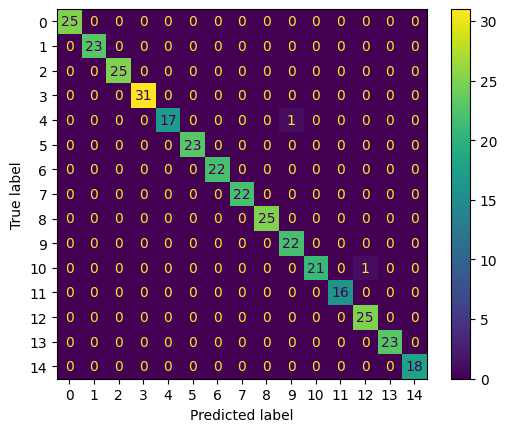

In [37]:
ConfusionMatrixDisplay(cm1).plot()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib # Using joblib as it's often better for scikit-learn models

# --- 1. Load the Dataset ---
print("Loading data...")
try:
    df = pd.read_csv("Crop_recommendation.csv")
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'Crop_recommendation.csv' not found.")
    print("Please make sure the dataset file is in the same folder as this script.")
    exit()

# --- 2. Prepare Data ---
# Separate features (X) and the target label (y)
X = df.drop(columns="label")
y = df['label']

# --- 3. Split Data into Training and Testing sets ---
# Using the same random_state as the notebook for consistency
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# --- 4. Train the Random Forest Model ---
print("Training the Random Forest model...")
# Using the same parameters from your notebook for best results
rfc_model = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=42)
rfc_model.fit(X_train, y_train)
print("✅ Model training complete.")

# --- 5. Evaluate the Model (Optional, but good to check) ---
y_pred = rfc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"📈 Model Accuracy on Test Data: {accuracy:.4f}") # Should be around 0.9971

# --- 6. Save the Trained Model to a Joblib File ---
model_filename = 'crop_recommendation_model.joblib'
joblib.dump(rfc_model, model_filename)
print(f"✅ Model successfully saved as '{model_filename}'")

# --- 7. Example of how to load and use the model ---
print("\\n--- Testing the saved model ---")
#loaded_model = joblib.load(model_filename)

# Create a sample data point for prediction (e.g., for rice)
sample_data = [[60,3.5,40,23.57,83.18,5.5,91.29]]
sample_df = pd.DataFrame(sample_data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

prediction = loaded_model.predict(sample_df)
print(f"Prediction for sample data: {prediction[0]}")

Loading data...
✅ Data loaded successfully.
Data split into 1357 training samples and 340 testing samples.
Training the Random Forest model...
✅ Model training complete.
📈 Model Accuracy on Test Data: 1.0000
✅ Model successfully saved as 'crop_recommendation_model.joblib'
\n--- Testing the saved model ---
Prediction for sample data: watermelon
